In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Importing CSVs and merging them

In [39]:
df_abrv = pd.read_csv('state-abbrevs.csv')
df_areas = pd.read_csv('state-areas.csv')
df_pop = pd.read_csv('state-population.csv')

In [40]:
df_abrv.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [41]:
df_areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [42]:
df_pop

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
...,...,...,...,...
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0


In [43]:
df_abrv.shape, df_areas.shape , df_pop.shape

((51, 2), (52, 2), (2544, 4))

In [44]:
df_abrv.isnull().sum()

state           0
abbreviation    0
dtype: int64

In [45]:
df_areas.isnull().sum()

state            0
area (sq. mi)    0
dtype: int64

In [79]:
df_pop.isnull().sum()

abbreviation     0
ages             0
year             0
population      20
dtype: int64

We'll deal with the nan values later, primary goal is merging

In [47]:
df_merged = df_abrv.merge(df_areas, on = 'state' , how = 'outer')

In [48]:
df_merged

,state,abbreviation,area (sq. mi)
0,Alabama,AL,52423
1,Alaska,AK,656425
2,Arizona,AZ,114006
3,Arkansas,AR,53182
4,California,CA,163707
5,Colorado,CO,104100
6,Connecticut,CT,5544
7,Delaware,DE,1954
8,District of Columbia,DC,68
9,Florida,FL,65758


In [49]:
df_merged[df_merged['abbreviation']=='PR']

,state,abbreviation,area (sq. mi)


Puerto Rico doesnt have Abbreviation we can add it maually

In [61]:
df_merged.loc[df_merged['state'] == 'Puerto Rico' , 'abbreviation'] = 'PR'

In [62]:
df_merged.tail()

,state,abbreviation,area (sq. mi)
47,Washington,WA,71303
48,West Virginia,WV,24231
49,Wisconsin,WI,65503
50,Wyoming,WY,97818
51,Puerto Rico,PR,3515


In [64]:
df_pop = df_pop.rename(columns = {'state/region':'abbreviation'})
df_pop.head()

,abbreviation,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [144]:
df = df_pop.merge(right = df_merged , on = 'abbreviation' , how = 'outer')

In [145]:
df

,abbreviation,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


In [146]:
df[df['abbreviation'] == 'AL']

,abbreviation,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
5,AL,total,2011,4801627.0,Alabama,52423.0
6,AL,total,2009,4757938.0,Alabama,52423.0
7,AL,under18,2009,1134192.0,Alabama,52423.0
8,AL,under18,2013,1111481.0,Alabama,52423.0
9,AL,total,2013,4833722.0,Alabama,52423.0


In [147]:
col_order = ['state','abbreviation','area (sq. mi)', 'ages', 'year', 'population']

In [148]:
df = df[col_order]

In [149]:
df

,state,abbreviation,area (sq. mi),ages,year,population
0,Alabama,AL,52423.0,under18,2012,1117489.0
1,Alabama,AL,52423.0,total,2012,4817528.0
2,Alabama,AL,52423.0,under18,2010,1130966.0
3,Alabama,AL,52423.0,total,2010,4785570.0
4,Alabama,AL,52423.0,under18,2011,1125763.0
...,...,...,...,...,...,...
2539,NaN,USA,NaN,total,2010,309326295.0
2540,NaN,USA,NaN,under18,2011,73902222.0
2541,NaN,USA,NaN,total,2011,311582564.0
2542,NaN,USA,NaN,under18,2012,73708179.0


In [150]:
df.isnull().sum()

state            48
abbreviation      0
area (sq. mi)    48
ages              0
year              0
population       20
dtype: int64

In [151]:
df[df['state'].isnull()]

,state,abbreviation,area (sq. mi),ages,year,population
2496,NaN,USA,NaN,under18,1990,64218512.0
2497,NaN,USA,NaN,total,1990,249622814.0
2498,NaN,USA,NaN,total,1991,252980942.0
2499,NaN,USA,NaN,under18,1991,65313018.0
2500,NaN,USA,NaN,under18,1992,66509177.0
2501,NaN,USA,NaN,total,1992,256514231.0
2502,NaN,USA,NaN,total,1993,259918595.0
2503,NaN,USA,NaN,under18,1993,67594938.0
2504,NaN,USA,NaN,under18,1994,68640936.0
2505,NaN,USA,NaN,total,1994,263125826.0


so we have USA in our new merged csv file. USA is not a state but a 50+ states combined country. We can not add this entry in the given data set. we will extract the USA records and put them in a new df

In [156]:
df_usa= df[df['abbreviation'] == 'USA']

In [157]:
df_usa.head()

,state,abbreviation,area (sq. mi),ages,year,population
2496,NaN,USA,NaN,under18,1990,64218512.0
2497,NaN,USA,NaN,total,1990,249622814.0
2498,NaN,USA,NaN,total,1991,252980942.0
2499,NaN,USA,NaN,under18,1991,65313018.0
2500,NaN,USA,NaN,under18,1992,66509177.0


In [158]:
df_usa= df_usa.drop(columns=['state','area (sq. mi)'])

In [159]:
df_usa.head()

,abbreviation,ages,year,population
2496,USA,under18,1990,64218512.0
2497,USA,total,1990,249622814.0
2498,USA,total,1991,252980942.0
2499,USA,under18,1991,65313018.0
2500,USA,under18,1992,66509177.0


In [160]:
df = df[df['abbreviation'] != 'USA']

In [161]:
df

,state,abbreviation,area (sq. mi),ages,year,population
0,Alabama,AL,52423.0,under18,2012,1117489.0
1,Alabama,AL,52423.0,total,2012,4817528.0
2,Alabama,AL,52423.0,under18,2010,1130966.0
3,Alabama,AL,52423.0,total,2010,4785570.0
4,Alabama,AL,52423.0,under18,2011,1125763.0
...,...,...,...,...,...,...
2491,Puerto Rico,PR,3515.0,under18,2010,896945.0
2492,Puerto Rico,PR,3515.0,under18,2011,869327.0
2493,Puerto Rico,PR,3515.0,total,2011,3686580.0
2494,Puerto Rico,PR,3515.0,under18,2012,841740.0


In [162]:
df.isnull().sum()

state             0
abbreviation      0
area (sq. mi)     0
ages              0
year              0
population       20
dtype: int64

In [164]:
df[df['population'].isnull()]

,state,abbreviation,area (sq. mi),ages,year,population
2448,Puerto Rico,PR,3515.0,under18,1990,NaN
2449,Puerto Rico,PR,3515.0,total,1990,NaN
2450,Puerto Rico,PR,3515.0,total,1991,NaN
2451,Puerto Rico,PR,3515.0,under18,1991,NaN
2452,Puerto Rico,PR,3515.0,total,1993,NaN
2453,Puerto Rico,PR,3515.0,under18,1993,NaN
2454,Puerto Rico,PR,3515.0,under18,1992,NaN
2455,Puerto Rico,PR,3515.0,total,1992,NaN
2456,Puerto Rico,PR,3515.0,under18,1994,NaN
2457,Puerto Rico,PR,3515.0,total,1994,NaN


now handling the nan values

In [165]:
df[df['abbreviation'] == 'PR'].shape

(48, 6)

In [166]:
df[df['abbreviation'] == 'PR'].dropna().shape

(28, 6)

In [167]:
df[df['abbreviation'] == 'PR'].dropna().shape[0]/df[df['abbreviation'] == 'PR'].shape[0] * 100

58.333333333333336

State with PR has nan values and 58% of the values are missing. filling the values will cause inconsistency and may bring destruction to our research therefore it is safe to drop it rather than fill it using any other means

In [168]:
df = df.dropna()

In [169]:
df.isnull().sum()

state            0
abbreviation     0
area (sq. mi)    0
ages             0
year             0
population       0
dtype: int64

exporting the DFs in new csv files

In [172]:
df.to_csv('Merged.csv',index=False)
df_usa.to_csv('USA.csv',index=False)

In [457]:
df = pd.read_csv('Merged.csv')
df_usa = pd.read_csv('USA.csv')

## Analysis

### Analyzing USA

In [458]:
df_usa.head()

,abbreviation,ages,year,population
0,USA,under18,1990,64218512.0
1,USA,total,1990,249622814.0
2,USA,total,1991,252980942.0
3,USA,under18,1991,65313018.0
4,USA,under18,1992,66509177.0


In [482]:
df_usa[(df_usa['year'] == 1990) | (df_usa['year'] == 2013)]

,abbreviation,ages,year,population
0,USA,under18,1990,64218512.0
1,USA,total,1990,249622814.0
38,USA,under18,2013,73585872.0
39,USA,total,2013,316128839.0


In [443]:
# result

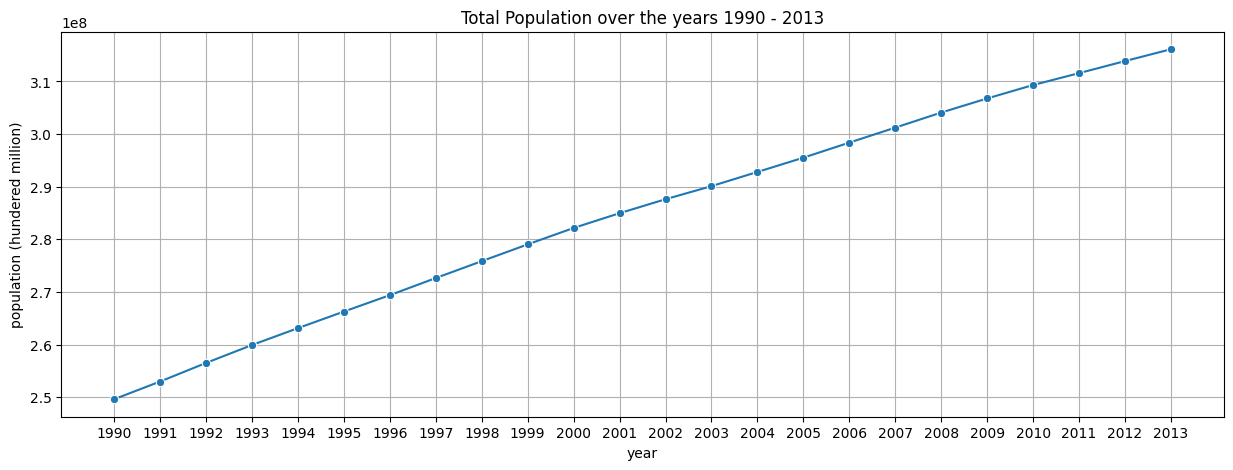

In [483]:
plt.figure(figsize = (15,5))
sns.lineplot(x='year', y='population', data= df_usa[df_usa['ages']  == 'total'], marker='o', linestyle='-')
plt.xticks(df_usa['year'].unique())
plt.title('Total Population over the years 1990 - 2013')
plt.ylabel('population (hundered million)')
plt.grid()
plt.show()

We have observed a steady increase in population with a relatively constant rate from 1990 till 2013 reaching its peak, 320 million population.

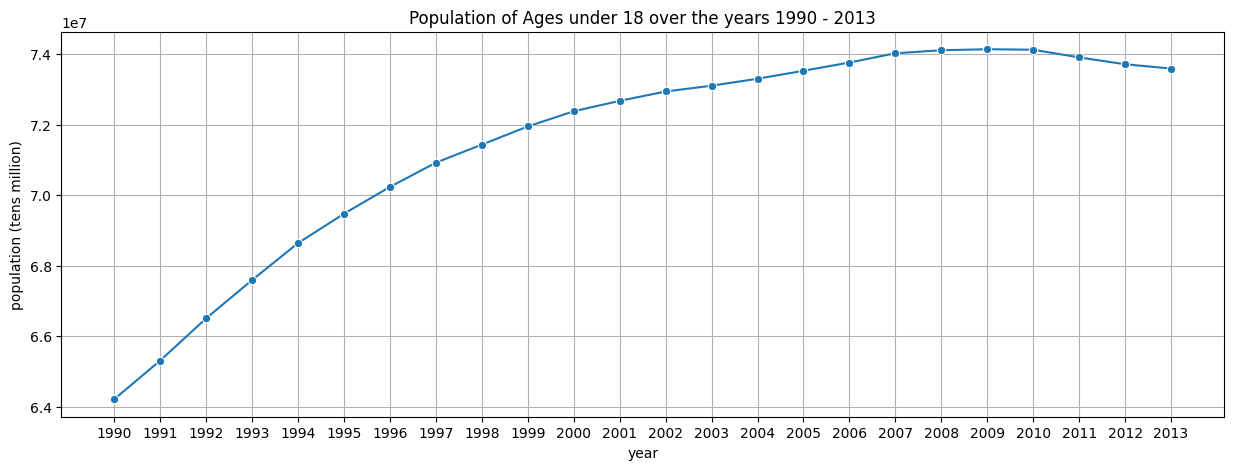

In [476]:
plt.figure(figsize = (15,5))
sns.lineplot(x='year', y='population', data= df_usa[df_usa['ages']  == 'under18'], marker='o', linestyle='-')
plt.xticks(df_usa['year'].unique())
plt.title('Population of Ages under 18 over the years 1990 - 2013')
plt.ylabel('population (tens million)')
plt.grid()
plt.show()

From the above graph, there is a steady but rapidly increasing population of individuals under 18 years of age from 1990 to 1999. Then, the growth rate decreased, making the slope almost constant during the years 2007 to 2010, followed by a decline afterwards.
The population reach it's peak in 2008 a bit above 74 millions

### Conclusion From USA data

- The total population steadily increased until 2013, reaching a peak of 320 million.
- The population of individuals under 18 years old grew rapidly from 1990 to 1999 but then saw a decline in growth rate, with a peak in 2008 at around 74 million.
- Over the observed period, there was a 14.5% increase in the population under 18 and a 21.03% increase in the total population.

From the observed graph, we can deduce that the total population increased more than the population under 18 indicates that factors beyond birth rates contributed to overall population growth. The declination in growth rate of individuals under 18 implies the decline in brith rate. However, we have seen the total population increasing regardless implying that this could be due to increase immigrants going to USA either for carrer oppurtunities or education.

### Ananlyzing States

In [520]:
df.head()

,state,abbreviation,area (sq. mi),ages,year,population
0,Alabama,AL,52423.0,under18,2012,1117489.0
1,Alabama,AL,52423.0,total,2012,4817528.0
2,Alabama,AL,52423.0,under18,2010,1130966.0
3,Alabama,AL,52423.0,total,2010,4785570.0
4,Alabama,AL,52423.0,under18,2011,1125763.0


In [578]:
result = df.groupby(['state','abbreviation'], as_index=False)['area (sq. mi)'].mean().sort_values(by ='area (sq. mi)' , ascending = False)
result.head()

,state,abbreviation,area (sq. mi)
1,Alaska,AK,656425.0
44,Texas,TX,268601.0
4,California,CA,163707.0
26,Montana,MT,147046.0
31,New Mexico,NM,121593.0


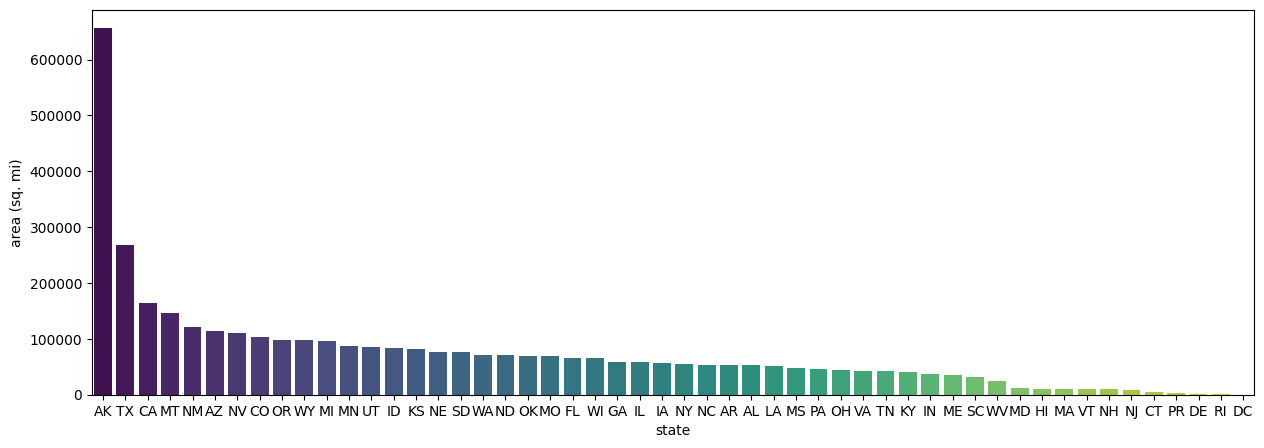

In [579]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'abbreviation' , y ='area (sq. mi)' , data = result , hue = 'abbreviation' , legend = False, palette = 'viridis')
plt.xlabel(xlabel='state')
plt.show()

Alaska (AK) is the largest state in the given data whereas Washington DC is the smallest state

We've previously observed a relatively linear population trend in the USA. To avoid redundancy, we'll focus on states with unique characteristics. Following this principle, we've chosen to analyze Alaska (as the largest state), the District of Columbia (the smallest state in the dataset), and Florida (positioned in the middle of the data). This allow us to get an overall pattern of states population in relation to their area

#### analysis on alaska because it's the largest state

In [607]:
result = df[df['abbreviation'] == 'AK']
result[result['ages']=='under18'].head()

,state,abbreviation,area (sq. mi),ages,year,population
49,Alaska,AK,656425.0,under18,1990,177502.0
51,Alaska,AK,656425.0,under18,1991,182180.0
52,Alaska,AK,656425.0,under18,1992,184878.0
54,Alaska,AK,656425.0,under18,1994,187439.0
57,Alaska,AK,656425.0,under18,1993,187190.0


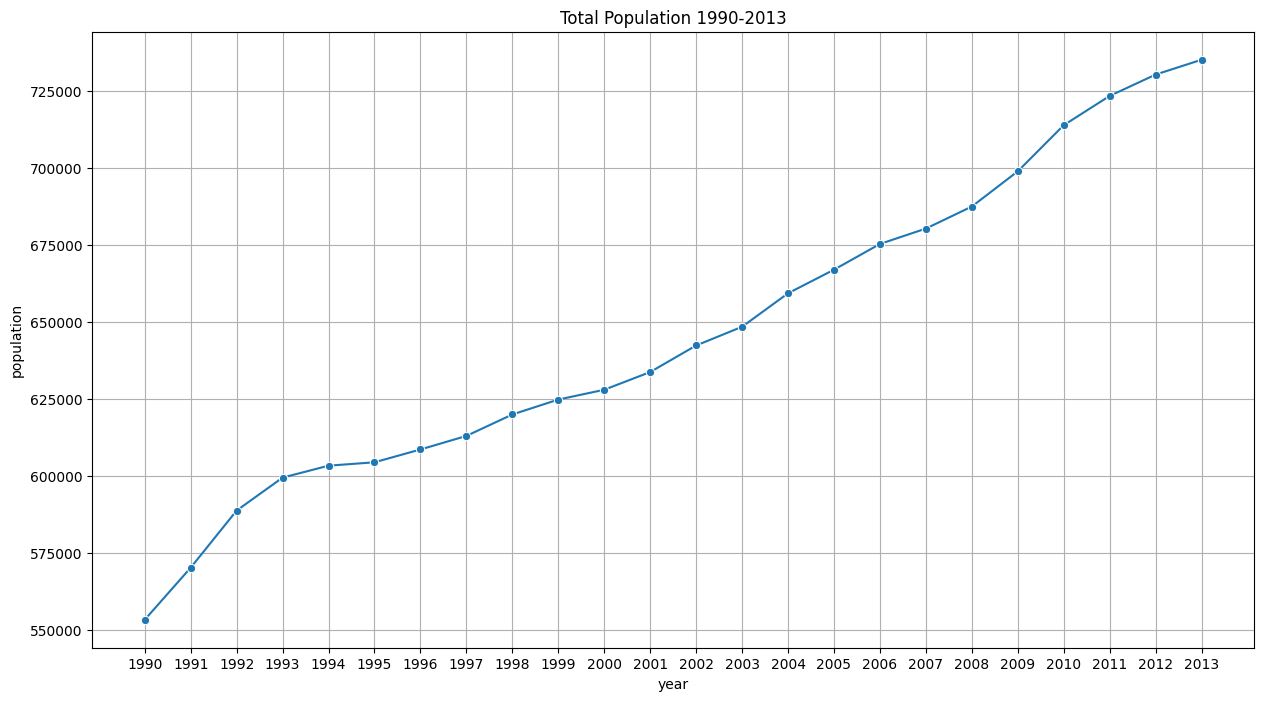

In [609]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'year' , y = 'population' , data = result[result['ages']=='total'] , marker = 'o' , linestyle='-')
plt.grid()
plt.xticks(result['year'].unique())
# plt.ticklabel_format(style='sci', axis='y' , scilimits =(0,0))

plt.title("Total Population 1990-2013")
plt.show()

A normal linear trend reaching plus 725k population in 2013

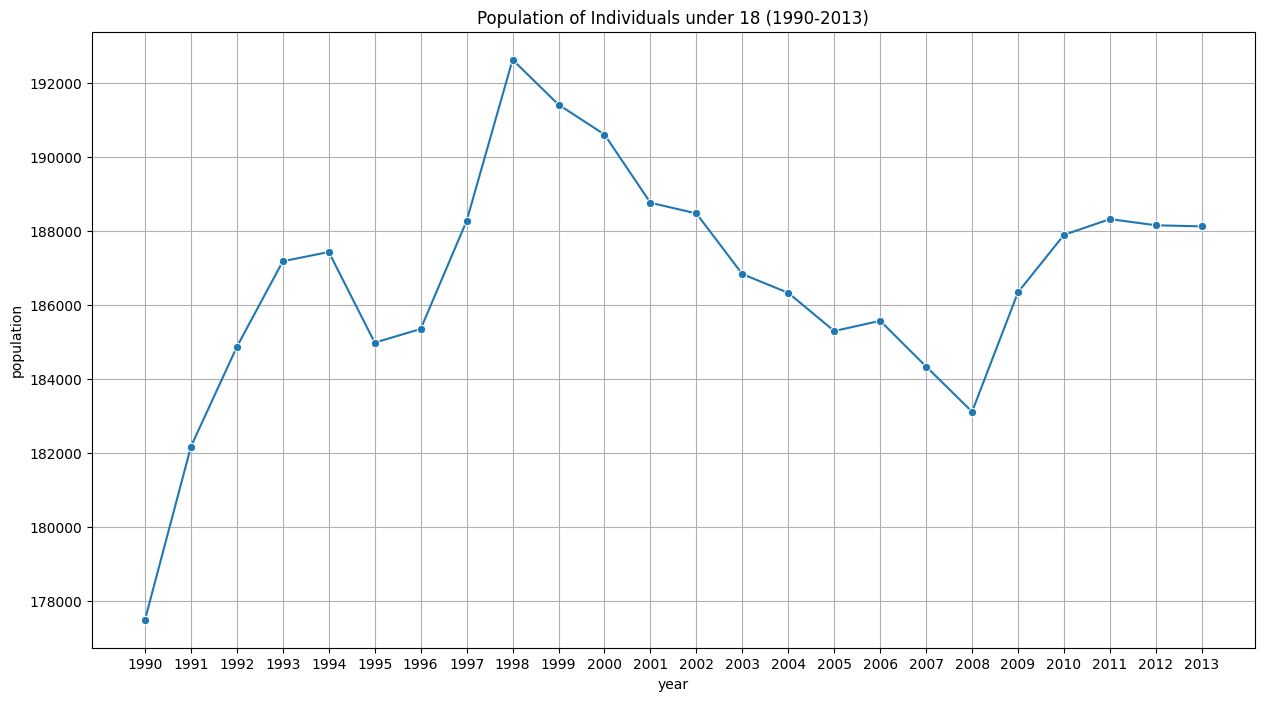

In [610]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'year' , y = 'population' , data = result[result['ages']=='under18'] , marker = 'o' , linestyle='-')
plt.grid()
plt.xticks(result['year'].unique())
# plt.ticklabel_format(style='sci', axis='y' , scilimits =(0,0))

plt.title("Population of Individuals under 18 (1990-2013)")
plt.show()

Alot of fluctuations in population under 18 reaching 188k in population in 2013 with 5.6% increase in population.

#### Analyzing District of Columbia

In [611]:
result = df[df['abbreviation'] == 'DC']
result.head()

,state,abbreviation,area (sq. mi),ages,year,population
384,District of Columbia,DC,68.0,under18,2012,107642.0
385,District of Columbia,DC,68.0,total,2012,633427.0
386,District of Columbia,DC,68.0,under18,2011,103906.0
387,District of Columbia,DC,68.0,total,2011,619624.0
388,District of Columbia,DC,68.0,under18,2010,101309.0


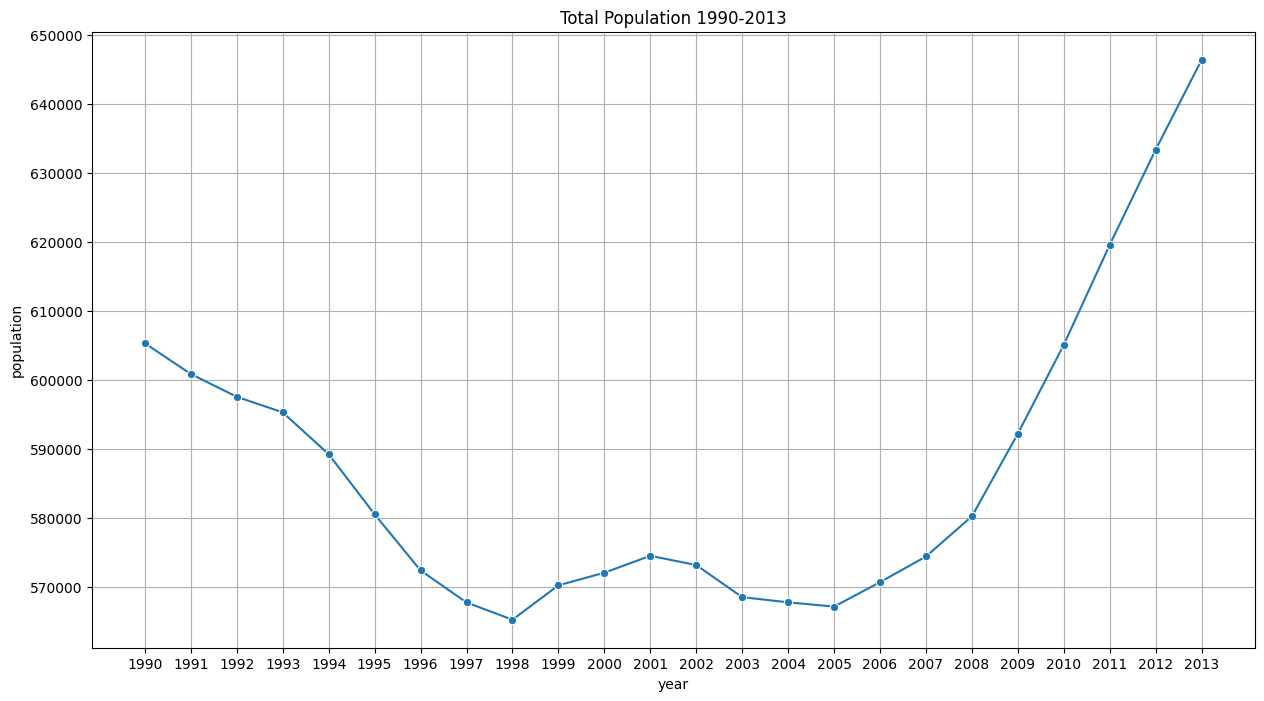

In [612]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'year' , y = 'population' , data = result[result['ages']=='total'] , marker = 'o' , linestyle='-')
plt.grid()
plt.xticks(result['year'].unique())
# plt.ticklabel_format(style='sci', axis='y' , scilimits =(0,0))

plt.title("Total Population 1990-2013")
plt.show()

The Total Population initially experienced a declining trend, reaching its lowest point in 1998. However, from 1999 to 2005, there was a slight upward trend. Subsequently, after 2005, the population began to exponentially increase, reaching approximately 645,000 by the end of 2013.

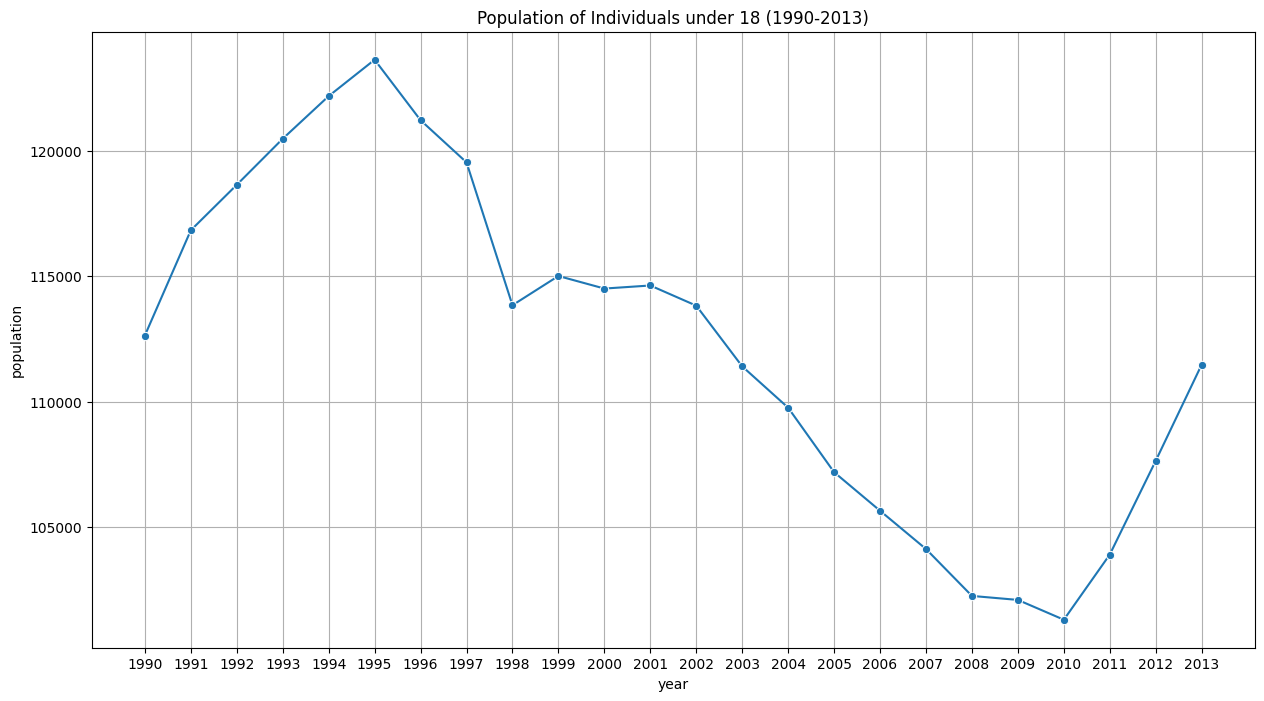

In [614]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'year' , y = 'population' , data = result[result['ages']=='under18'] , marker = 'o' , linestyle='-')
plt.grid()
plt.xticks(result['year'].unique())
# plt.ticklabel_format(style='sci', axis='y' , scilimits =(0,0))

plt.title("Population of Individuals under 18 (1990-2013)")
plt.show()

The Population of Individuals under 18 exhibited an increasing trend from 1990 to 1995, followed by a shift towards a decline until reaching its lowest point in 2010. However, there was another change in trend after 2010, resulting in an increase in growth rate.

In [624]:
result = df[df['abbreviation'] == 'FL']
result[result['ages']=='under18'] ['population'].max()

4031098.0

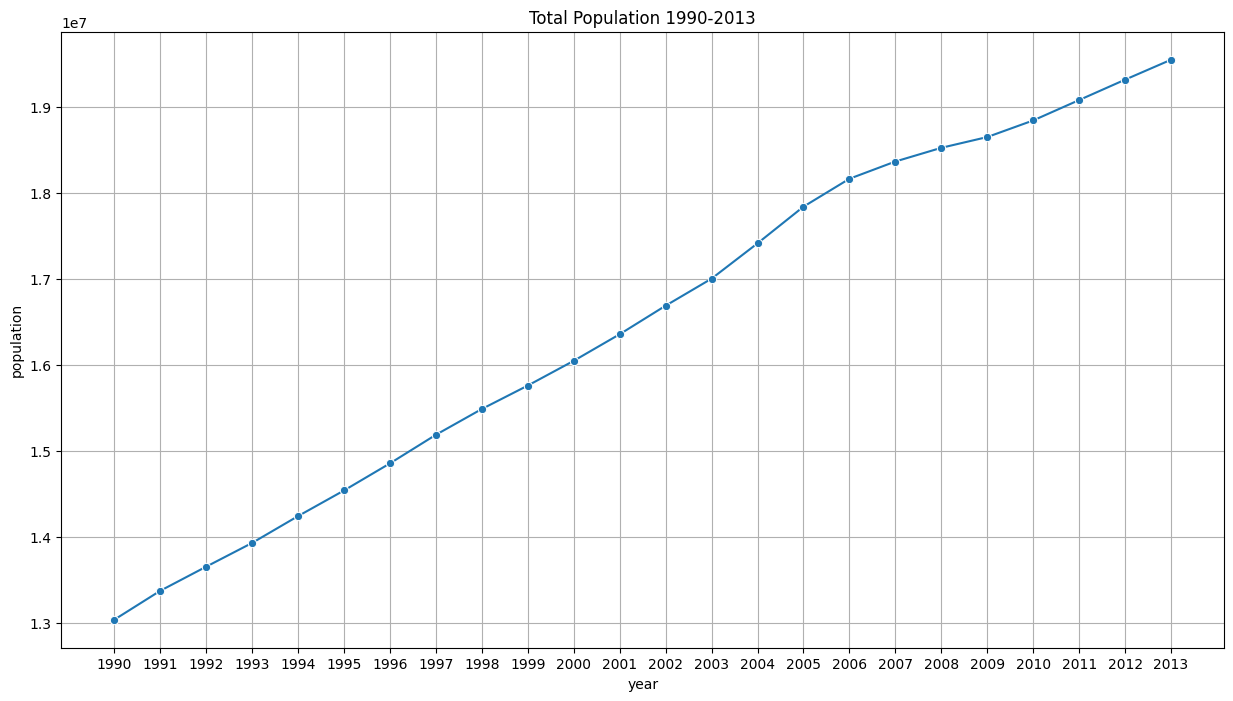

In [603]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'year' , y = 'population' , data = result[result['ages']=='total'] , marker = 'o' , linestyle='-')
plt.grid()
plt.xticks(result['year'].unique())
plt.ticklabel_format(style='sci', axis='y' , scilimits =(0,0))

plt.title("Total Population 1990-2013")
plt.show()

The total population of Florida has been steadily growing, reaching approximately 195,000 by the end of the observed period. This represents a 50% increase in population compared to 1990

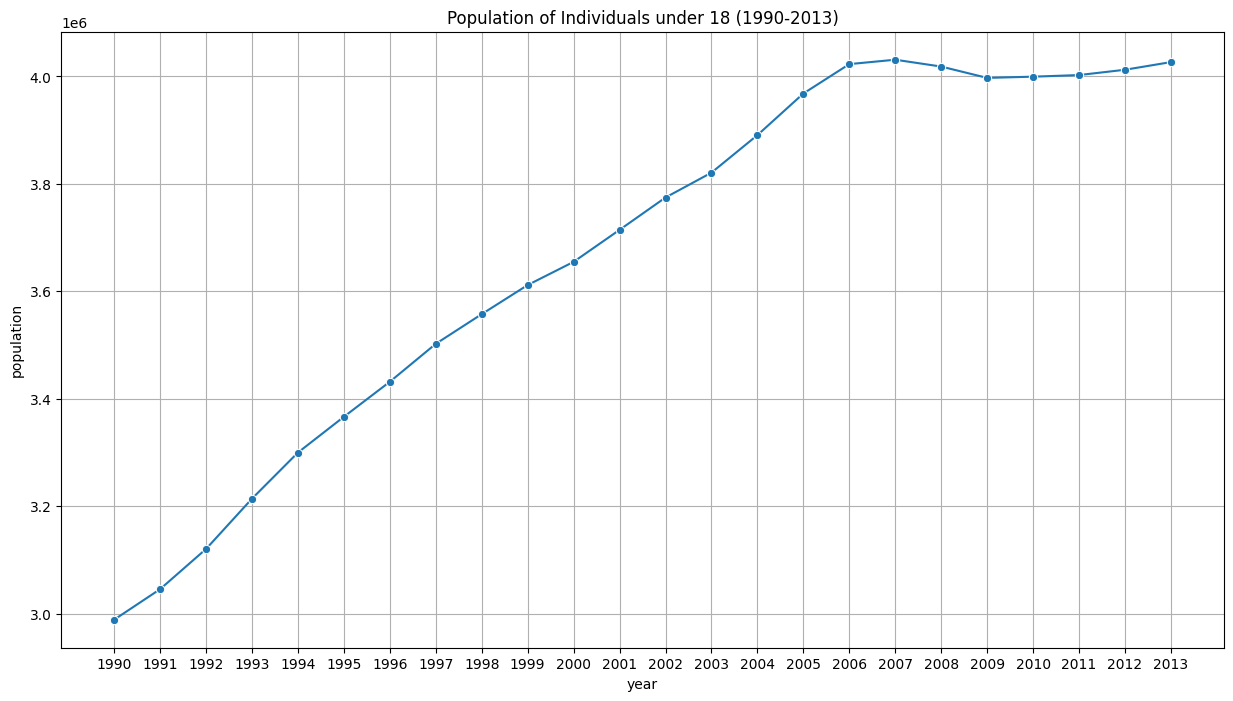

In [604]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'year' , y = 'population' , data = result[result['ages']=='under18'] , marker = 'o' , linestyle='-')
plt.grid()
plt.xticks(result['year'].unique())
plt.ticklabel_format(style='sci', axis='y' , scilimits =(0,0))

plt.title("Population of Individuals under 18 (1990-2013)")
plt.show()

The population of individuals under 18 in Florida exhibited a steady growth rate from 1990 to 2006. However, after 2006, there was a shift towards relatively constant population strength, which persisted until 2013.

## Conclusion

The USA's total population steadily increased until 2013, reaching 320 million, with a notable rise in individuals under 18 until 2008, followed by a decline. Despite this, the total population continued to rise, suggesting factors beyond birth rates contributed to growth, possibly immigration.

- Our state selection process was guided by the desire to capture diverse demographic dynamics.
- We focused on Alaska, the District of Columbia (DC), and Florida, leveraging their unique characteristics.
- Alaska, as the largest state, demonstrated a linear population trend, reaching over 725,000 in total population by 2013.
  - Despite fluctuations, the under-18 population reached 188,000 in 2013, representing a 5.6% increase.
- In contrast, DC experienced an initial decline in total population until 1998, followed by exponential growth, reaching approximately 645,000 by 2013.
  - The under-18 population exhibited an initial increase until 1995, followed by a decline until 2010, with a resurgence thereafter.
- Florida, positioned in the middle, showed steady total population growth, reaching about 195,000 by the end of the observed period, a 50% increase from 1990.
  - The under-18 population in Florida exhibited steady growth until 2006, followed by relatively constant population strength untillanning.